In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.max()

255

Text(0.5, 1.0, 'Pixel Value Distribution')

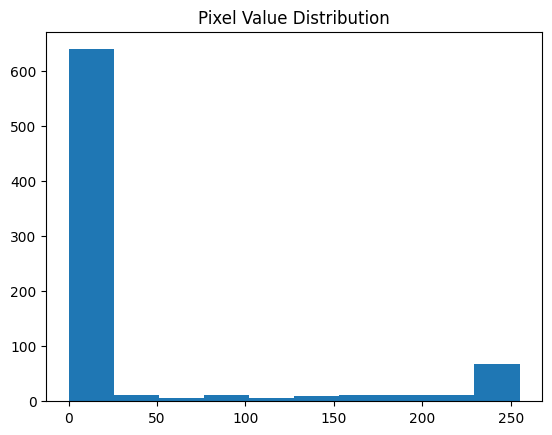

In [ ]:
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Value Distribution")

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

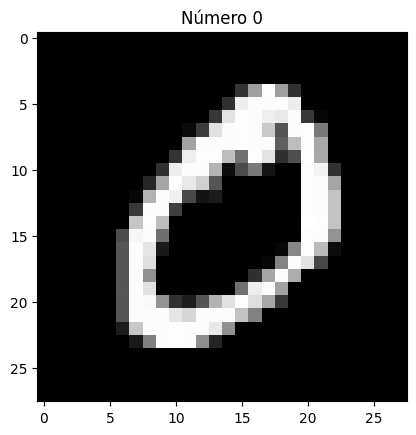

In [ ]:
index = 1
plt.imshow(x_train[index], cmap='gray')
plt.title(f'Número {y_train[index].argmax()}')
plt.show()

In [ ]:
# Normalizar las imágenes y las etiquetas
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# preproceasmiento de etiquetas (one-hot encoding), contaremos con un modelo de 10 salidas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# modelo de red neuronal
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Esto es para "aplanar" la forma y pasar a 784,
model.add(Dense(128, activation='relu'))  # Capa oculta con 128 neuronas y función de activación ReLU
model.add(Dense(10, activation='softmax'))  # Capa de salida con 10 neuronas para los dígitos y función de activación Softmax porque son mas de dos clases!!!

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 23s 11ms/step - loss: 0.2606 - accuracy: 0.9251 - val_loss: 0.1469 - val_accuracy: 0.9567
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1153 - accuracy: 0.9661 - val_loss: 0.0934 - val_accuracy: 0.9718
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0790 - accuracy: 0.9768 - val_loss: 0.0982 - val_accuracy: 0.9698
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0589 - accuracy: 0.9810 - val_loss: 0.0857 - val_accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.0834 - val_accuracy: 0.9743


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Pérdida test: {loss}')
print(f'Exactitud test: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0834 - accuracy: 0.9743
Pérdida test: 0.08338142931461334
Exactitud test: 0.9743000268936157


In [ ]:
model.save('mnist_model.h5')

In [ ]:
model.predict(x_train[1].reshape(1,28,28))

1/1 [==============================] - 0s 88ms/step


array([[9.9994624e-01, 3.7489690e-12, 5.3631171e-05, 1.7564022e-09,
        1.0024455e-12, 5.5200750e-10, 1.6443967e-07, 7.8276718e-10,
        7.0678459e-09, 1.6296520e-08]], dtype=float32)

In [ ]:
model.predict(x_train[1:3].reshape(2,28,28))

1/1 [==============================] - 0s 23ms/step


array([[9.9994624e-01, 3.7489690e-12, 5.3631120e-05, 1.7564022e-09,
        1.0024475e-12, 5.5200750e-10, 1.6443967e-07, 7.8276718e-10,
        7.0678459e-09, 1.6296552e-08],
       [2.7100650e-10, 3.2855398e-06, 8.3119172e-05, 2.0630544e-06,
        9.9957937e-01, 1.0134504e-06, 1.1209280e-05, 1.6784210e-04,
        1.0449528e-04, 4.7509206e-05]], dtype=float32)

## Otras soluciones:

Se utilizan capas convolucionales

In [ ]:
from keras.layers import Conv2D
from keras.optimizers import SGD

batch_size=32
epochs=3

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#model.save('mnist.h5')

Epoch 1/3
1875/1875 [==============================] - 56s 29ms/step - loss: 0.2264 - accuracy: 0.9320 - val_loss: 0.0997 - val_accuracy: 0.9691
Epoch 2/3
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0775 - accuracy: 0.9762 - val_loss: 0.0727 - val_accuracy: 0.9774
Epoch 3/3
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0623 - val_accuracy: 0.9796
The model has successfully trained
Test loss: 0.06233794987201691
Test accuracy: 0.9796000123023987
